### Basic LangGraph Chatbot

In [24]:
from typing import TypedDict, Annotated
from langchain_core.messages import BaseMessage, HumanMessage, SystemMessage
from langgraph.graph.message import add_messages
from langchain_ollama import OllamaLLM
from langgraph.graph import START, StateGraph,END
from langgraph.checkpoint.memory import MemorySaver
import os
from dotenv import load_dotenv
load_dotenv()


True

In [25]:
class State(TypedDict):
    messages: Annotated[list[BaseMessage], add_messages]
llm = OllamaLLM(model="llama3.2", stream=True)


In [26]:
for chunk in llm.stream("parrot"):
    print(chunk, end="", flush=True)

Parrots are fascinating and intelligent birds known for their vibrant plumage, distinctive calls, and ability to mimic human speech. Here are some interesting facts about parrots:

1. **Diversity**: There are over 350 species of parrots, ranging in size, shape, color, and behavior.
2. **Intelligence**: Parrots are considered one of the most intelligent bird species, known for their problem-solving abilities, memory, and innovation.
3. **Mimicry**: Many parrot species are famous for their ability to mimic human speech, as well as other sounds they hear in their environment.
4. **Social behavior**: Some parrots are social birds that live in flocks, while others are solitary animals. Many parrots are known to form strong bonds with their owners.
5. **Diet**: Parrots are omnivores, which means they eat a variety of foods including seeds, fruits, vegetables, and insects.
6. **Lifespan**: The lifespan of a parrot varies depending on the species, but many can live up to 50-60 years in captivi

In [27]:
async for chunk in llm.astream("parrot"):
    print(chunk, end="", flush=True)

Parrots!

Here are some interesting facts about parrots:

1. **Colorful plumage**: Parrots are known for their vibrant colors and bright plumage, which helps them to blend in with their surroundings.
2. **Intelligent birds**: Parrots are considered one of the most intelligent bird species, known for their ability to learn and mimic human speech.
3. **Long lifespan**: Many parrot species can live up to 50-100 years or more in captivity, making them a long-term companion for some owners.
4. **Social animals**: Parrots are social birds that thrive on interaction and attention from humans and other birds.
5. **Diverse family**: There are over 350 species of parrots, ranging in size, shape, and behavior.

Some popular parrot species include:

1. **African Grey**: Known for their intelligence and ability to mimic human speech.
2. **Amazon Parrot**: One of the most colorful and vibrant parrot species.
3. **Cockatiel**: A popular pet parrot known for its gentle and affectionate nature.
4. **Ma

In [28]:
async for event in llm.astream_events("parrot", version="v1"):
    print(event, flush=True)

{'event': 'on_llm_start', 'run_id': 'd3591e72-3912-4c0f-bfd9-f64b99189452', 'name': 'OllamaLLM', 'tags': [], 'metadata': {}, 'data': {'input': 'parrot'}, 'parent_ids': []}
{'event': 'on_llm_stream', 'run_id': 'd3591e72-3912-4c0f-bfd9-f64b99189452', 'tags': [], 'metadata': {}, 'name': 'OllamaLLM', 'data': {'chunk': 'Par'}, 'parent_ids': []}
{'event': 'on_llm_stream', 'run_id': 'd3591e72-3912-4c0f-bfd9-f64b99189452', 'tags': [], 'metadata': {}, 'name': 'OllamaLLM', 'data': {'chunk': 'rots'}, 'parent_ids': []}
{'event': 'on_llm_stream', 'run_id': 'd3591e72-3912-4c0f-bfd9-f64b99189452', 'tags': [], 'metadata': {}, 'name': 'OllamaLLM', 'data': {'chunk': ' are'}, 'parent_ids': []}
{'event': 'on_llm_stream', 'run_id': 'd3591e72-3912-4c0f-bfd9-f64b99189452', 'tags': [], 'metadata': {}, 'name': 'OllamaLLM', 'data': {'chunk': ' a'}, 'parent_ids': []}
{'event': 'on_llm_stream', 'run_id': 'd3591e72-3912-4c0f-bfd9-f64b99189452', 'tags': [], 'metadata': {}, 'name': 'OllamaLLM', 'data': {'chunk': ' g

In [29]:
llm

OllamaLLM(model='llama3.2')

In [30]:
def chatbot_node(state: State) -> State:
    """ The main chatbot node that processes the user input and returns the response """
    # print(f"Processing {state['messages']} messages")
    response =  llm.invoke(state['messages'])
    # print(f"Response: {response}")
    return {"messages": state['messages']}

print("Chatbot node function created")

Chatbot node function created


In [31]:
graph_builder = StateGraph(State)

graph_builder.add_node("chatbot", chatbot_node)
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

graph = graph_builder.compile()

print("Graph structure created")
print("Graph compiled successfully")


Graph structure created
Graph compiled successfully


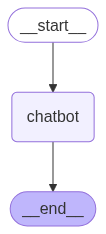

In [32]:
img= graph.get_graph(xray=True).draw_mermaid_png()
with open("graph.png", "wb") as f:
    f.write(img)
from IPython.display import Image
display(Image("graph.png"))

### TESTING THE CHATBOT

In [33]:
def test_chatbot(message: str):
    """Helper function to test the chatbot"""
    initial_state={"messages": [HumanMessage(content=message)]}
    # print(initial_state)
    response = graph.invoke(initial_state)
    ai_response = response["messages"][-1].content
    print("AI:", ai_response)
    # print("Response:", response)
    return response
test_cases = [
    "Hello my name is Ahmad",
    "Do you know who I am?",
]
for test_case in test_cases:
    test_chatbot(test_case)
    

AI: Hello my name is Ahmad
AI: Do you know who I am?


### ADDING MEMORY TO THE CHATBOT

In [34]:
memory = MemorySaver()

graph_with_memory = graph_builder.compile(checkpointer=memory)

# print("Memory added to the graph")

def chat_with_meomry(message: str, thread_id:str):
    """ Chat function with memory """
    print("User:", message)

    config = {
        "configurable": {
            "thread_id": thread_id
        }
    }
    initial_state = {"messages": [HumanMessage(content=message)]}
    result = graph_with_memory.invoke(initial_state, config)
    ai_response = result["messages"][-1].content
    # print("AI:", ai_response)
    # print("Memory:",result)
    return result

chat_with_meomry("Hi my name is Ahmad", "thread-1")
chat_with_meomry("What is my name?", "thread-1")


User: Hi my name is Ahmad
User: What is my name?


{'messages': [HumanMessage(content='Hi my name is Ahmad', additional_kwargs={}, response_metadata={}, id='7d03e645-cbe6-414f-9260-26575c930c9a'),
  HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={}, id='d80ad222-3944-422d-b130-65f56067046c')]}

In [35]:
from langchain_ollama import ChatOllama

def add(a, b):
    """Sum of two numbers"""
    return a + b

llm = ChatOllama(model="llama3.2").bind_tools([add])

result=llm.invoke("What is the sum of 1 and 2?")

print(result.tool_calls)





[{'name': 'add', 'args': {'a': 1, 'b': 2}, 'id': '64ce6f65-40cd-44c8-b477-b8532aa6065a', 'type': 'tool_call'}]


In [36]:
from typing import List

from langchain_core.messages import AIMessage
from langchain_core.tools import tool
from langchain_ollama import ChatOllama


@tool
def validate_user(user_id: int, addresses: List[str]) -> bool:
    """Validate user using historical addresses.

    Args:
        user_id (int): the user ID.
        addresses (List[str]): Previous addresses as a list of strings.
    """
    return True


llm = ChatOllama(
    model="llama3.2",
    temperature=0,
).bind_tools([validate_user])

result = llm.invoke(
    "Could you validate user 123? They previously lived at "
    "123 Fake St in Boston MA and 234 Pretend Boulevard in "
    "Houston TX."
)

if isinstance(result, AIMessage) and result.tool_calls:
    print(result.tool_calls)

[{'name': 'validate_user', 'args': {'addresses': ['123 Fake St', '234 Pretend Boulevard'], 'user_id': '123'}, 'id': 'ecb242ae-d24d-45e2-9576-0cac7a7665e0', 'type': 'tool_call'}]


In [93]:
from typing import Any, Dict, Optional, TypedDict

from langchain_core.runnables import RunnableConfig


class ToolCallRequest(TypedDict):
    """A typed dict that shows the inputs into the invoke_tool function."""

    name: str
    arguments: Dict[str, Any]


def invoke_tool(
    tool_call_request: ToolCallRequest, config: Optional[RunnableConfig] = None
):
    """A function that we can use the perform a tool invocation.

    Args:
        tool_call_request: a dict that contains the keys name and arguments.
            The name must match the name of a tool that exists.
            The arguments are the arguments to that tool.
        config: This is configuration information that LangChain uses that contains
            things like callbacks, metadata, etc.See LCEL documentation about RunnableConfig.

    Returns:
        output from the requested tool
    """
    tool_name_to_tool = {tool.name: tool for tool in tools}
    name = tool_call_request["name"]
    # print("Invoking tool:", name)
    requested_tool = tool_name_to_tool[name]
    return requested_tool.invoke(tool_call_request["arguments"], config=config)

In [ ]:
from langchain_core.runnables import RunnablePassthrough
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.tools import tool
from langchain_core.tools import render_text_description
from langchain_core.output_parsers import JsonOutputParser
from langchain_community.llms import Ollama
from langchain_community.document_loaders import TextLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_ollama import OllamaEmbeddings
from langchain_community.vectorstores import Chroma
from langchain_core.runnables import RunnableParallel
from langchain_core.prompts import PromptTemplate
from langchain.chains import RetrievalQA

@tool
def multiply(x: float, y: float) -> float:
    """Multiply two numbers together."""
    return x * y


@tool
def add(x: int, y: int) -> int:
    "Add two numbers."
    return x + y


@tool
def subtract(x: int, y: int) -> int:
    "Subtract two numbers."
    return x + y

@tool
def validate_user(user_id: int, addresses: List[str]) -> dict:
    """Validate user using historical addresses.

    Args:
        user_id (int): the user ID.
        addresses (List[str]): Previous addresses as a list of strings.
    """
    return 1

tools = [multiply, add, subtract, validate_user]

rendered_tools = render_text_description(tools)


model = Ollama(model="llama3.2")
# system_prompt = f"""\
# You are an assistant that has access to the following set of tools. 
# Here are the names and descriptions for each tool:

# {rendered_tools}

# Given the user input, return the name and input of the tool to use. 
# Return your response as a JSON blob with 'name' and 'arguments' keys.

# The `arguments` should be a dictionary, with keys corresponding 
# to the argument names and the values corresponding to the requested values.
# """

system_prompt = f"""\
You are an assistant that has access to the following tools:
{rendered_tools}

You also have access to additional product help documentation.

Use this information to determine the correct tool to call. If relevant, use the context to enhance your tool call.

Return your response as a JSON blob with 'name' and 'arguments' keys.

The `arguments` should be a dictionary with keys as argument names.

Context:
{{context}}
"""

base_dir = os.getcwd()
product_file_path = os.path.join(base_dir, "knowledge-base", "product_help.txt")
product_loader = TextLoader(product_file_path)
product_docs = product_loader.load()
print("Product docs:", product_docs)

text_splitter = RecursiveCharacterTextSplitter(
            chunk_size=300,
            chunk_overlap=50
        )

embeddings = OllamaEmbeddings(
            model="mxbai-embed-large",
            base_url="http://10.28.85.206:11434/"
        )
vectorstore = Chroma.from_documents(
            documents=product_docs,
            embedding=embeddings,
            persist_directory="chroma_db",
        )
retriever = vectorstore.as_retriever()

contextualize = RunnableParallel({
    "input": lambda x: x["input"],
    "context": lambda x: retriever.invoke(x["input"]),
})

prompt = ChatPromptTemplate.from_messages(
    [("system", system_prompt), ("user", "{input}")]
)
product_chunks = text_splitter.split_documents(product_docs)

classification_prompt = PromptTemplate.from_template("""
Classify the user query into one of two categories:
- "tool" if it requires using a tool like add, multiply, subtract, validate_user.
- "doc" if it is a question that should be answered from product documentation.

User query: {query}
Only return one word: "tool" or "doc"
""")

def classify_query(query: str) -> str:
    print("Classifying query:", query)
    response = model.invoke(classification_prompt.format(query=query))
    return response.strip().lower().strip('"')


chain = (
    contextualize | prompt | model | JsonOutputParser() | RunnablePassthrough.assign(output=invoke_tool)
)
# chain.invoke({"input": "Could you validate user 123? They previously lived at "
#     "123 Fake St in Boston MA and 234 Pretend Boulevard in "
#     "Houston TX."})

doc_qa_chain = RetrievalQA.from_chain_type(
    llm=model,
    retriever=vectorstore.as_retriever(),
    return_source_documents=False  # Optional: include sources
)

def smart_router(user_input: str):
    intent = classify_query(user_input)
    print("Intent:", intent)
    if "tool" in intent:
        return chain.invoke({"input": user_input})
    else:
        return doc_qa_chain.invoke(user_input)

# chain.invoke({"input": "Could you validate user 123? They previously lived at 123 Fake St in Boston MA and 234 Pretend Boulevard in Houston TX."})
# print("Result:", result)
response = smart_router("Subtract two numbers 3 and 5")
print(response)

Product docs: [Document(metadata={'source': '/media/muhammadahmad/DATA3/data-derive/generative-ai/langgraph/knowledge-base/product_help.txt'}, page_content='## [type: product]\n\n1. What is GL website?\nGL (General Ledger) software is an accounting tool designed to manage and track all financial transactions, automate journal entries, generate reports, and ensure compliance with accounting standards.\n\n2. What features does GL website offer?\nGL includes features like automated journal entries, real-time financial reporting, multi-user access, audit trails, bank reconciliation, and customizable dashboards.\n\n3. Is GL website suitable for small and medium businesses?\nAbsolutely. GL website is scalable and customizable, making it suitable for startups, SMEs, and growing enterprises that need accurate financial tracking and reporting.\n\n4. How secure is financial data in GL website?\nGL website uses encryption, role-based access control, and regular backups to ensure your financial da